In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LAB 1

In [ ]:
Data = pd.read_csv('owid-covid-data.csv')
data = Data[Data['location'] == 'Poland']
data = pd.DataFrame(data, columns = ['date', 'new_cases', 'new_deaths', 'hosp_patients', 'new_tests'])
print(data.describe())

In [ ]:
data['date'] = pd.to_datetime(data['date']) - pd.to_timedelta(7, unit='d')
data_weeks = data.resample('W-MON', on='date')['new_cases', 'new_deaths', 'hosp_patients', 'new_tests'].sum()
data_weeks.drop(data_weeks.tail(1).index,inplace=True) # remove last shorter week

plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
plt.title('new_cases')
data_weeks['new_cases'].plot()
plt.subplot(2,2,2)
plt.title('new_deaths')
data_weeks['new_deaths'].plot()
plt.subplot(2,2,3)
plt.title('hosp_patients')
data_weeks['hosp_patients'].plot()
plt.subplot(2,2,4)
plt.title('new_tests')
data_weeks['new_tests'].plot()

plt.show()

In [ ]:
data_norm=(data_weeks-data_weeks.min())/(data_weeks.max()-data_weeks.min())
data_change = data_norm/data_norm.shift(1)
data_norm.plot()
plt.title('normalized plot')
plt.show()

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
plt.title('new_cases')
data_change['new_cases'].plot()
plt.subplot(2,2,2)
plt.title('new_deaths')
data_change['new_deaths'].plot()
plt.subplot(2,2,3)
plt.title('hosp_patients')
data_change['hosp_patients'].plot()
plt.subplot(2,2,4)
plt.title('new_tests')
data_change['new_tests'].plot()

plt.show()

In [ ]:
data_norm['shifted_cases'] = data_norm['new_cases'].shift(1)
nbr = len(data_norm['new_cases'])
data_norm.plot.scatter('new_cases', 'shifted_cases', c = np.linspace(0,1, nbr))
plt.show()

data_norm['shifted_deaths'] = data_norm['new_deaths'].shift(1)
nbr = len(data_norm['new_deaths'])
data_norm.plot.scatter('new_deaths', 'shifted_deaths', c = np.linspace(0,1, nbr))
plt.show()

data_norm['shifted_hosp'] = data_norm['hosp_patients'].shift(1)
nbr = len(data_norm['hosp_patients'])
data_norm.plot.scatter('hosp_patients', 'shifted_hosp', c = np.linspace(0,1, nbr))
plt.show()

data_norm['shifted_tests'] = data_norm['new_tests'].shift(1)
nbr = len(data_norm['new_tests'])
data_norm.plot.scatter('new_tests', 'shifted_tests', c = np.linspace(0,1, nbr))
plt.show()


# LAB 2

In [107]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor


In [108]:
Data = pd.read_csv('owid-covid-data.csv')
data = Data[Data['location'] == 'Poland']
print(data.keys())


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [109]:
column = ['date', 'new_cases', 'new_deaths', 'hosp_patients', 'new_tests'] #, 'new_vaccinations'] # which data you want to analyze
data['date'] = pd.to_datetime(data['date']) - pd.to_timedelta(7, unit='d')
data = data[column]
print('Liczba brakujących dla wszystkich kolumn: ', data.isna().sum().sum())
print(' Dla analizowanych kolumn: \n', data[column].isna().sum())

Liczba brakujących dla wszystkich kolumn:  136
 Dla analizowanych kolumn: 
 date              0
new_cases         0
new_deaths        8
hosp_patients    59
new_tests        69
dtype: int64


<ipython-input-109-55a35ba20668>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date']) - pd.to_timedelta(7, unit='d')


In [110]:
data.describe()

,new_cases,new_deaths,hosp_patients,new_tests
count,631.000000,623.000000,572.000000,562.000000
mean,5397.985737,131.120385,8640.279720,41052.516014
std,7717.680840,186.926951,9252.491587,28172.717837
min,0.000000,0.000000,271.000000,7304.000000
25%,311.500000,9.000000,1786.000000,22347.250000
50%,812.000000,25.000000,2760.500000,38973.500000
75%,8338.000000,223.500000,15758.750000,51953.750000
max,35253.000000,956.000000,34864.000000,486086.000000


### Missing values added with KNN

In [111]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
imputer.fit_transform(data[column[1:]])
data_KNN = imputer.transform(data[column[1:]])
data[column[1:]] = data_KNN
print('Liczba brakujących dla wszystkich kolumn: ', data.isna().sum().sum())
print(' Dla analizowanych kolumn: \n', data[column].isna().sum())

Liczba brakujących dla wszystkich kolumn:  0
 Dla analizowanych kolumn: 
 date             0
new_cases        0
new_deaths       0
hosp_patients    0
new_tests        0
dtype: int64


In [112]:
data.describe()

,new_cases,new_deaths,hosp_patients,new_tests
count,631.000000,631.000000,631.000000,631.000000
mean,5397.985737,129.465610,8473.564184,39593.534390
std,7717.680840,186.310394,9348.990411,27211.704384
min,0.000000,0.000000,271.000000,7304.000000
25%,311.500000,8.500000,1649.500000,21965.500000
50%,812.000000,24.000000,2649.000000,36356.000000
75%,8338.000000,212.000000,15691.500000,49452.500000
max,35253.000000,956.000000,34864.000000,486086.000000


In [113]:
data.mean()

<ipython-input-113-abc01cf6c622>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean()


new_cases         5397.985737
new_deaths         129.465610
hosp_patients     8473.564184
new_tests        39593.534390
dtype: float64

### One-dimention outlier detection

In [114]:
data_no_date = data[column[1:]]
outliers = data_no_date[np.abs(data_no_date-data_no_date.mean()) <= (3*data_no_date.std())]
outliers.isna().sum()


new_cases        9
new_deaths       6
hosp_patients    0
new_tests        1
dtype: int64

In [115]:
data.loc[data_no_date[outliers.isnull().any(axis=1)].index]

,date,new_cases,new_deaths,hosp_patients,new_tests
98195,2020-11-17,32733.0,540.0,22405.0,32843.0
98315,2021-03-17,30802.0,579.0,26511.0,95192.0
98316,2021-03-18,34150.0,520.0,27118.0,102073.0
98317,2021-03-19,35145.0,445.0,27779.0,106617.0
98318,2021-03-20,31759.0,448.0,28574.0,100299.0
98319,2021-03-21,29266.0,131.0,29071.0,86011.0
98322,2021-03-24,32891.0,653.0,31311.0,102124.0
98323,2021-03-25,35253.0,620.0,31811.0,108741.0
98324,2021-03-26,30541.0,500.0,31955.0,100323.0
98330,2021-04-01,27890.0,956.0,34864.0,110625.0


### Multi-dimensional outlier detection

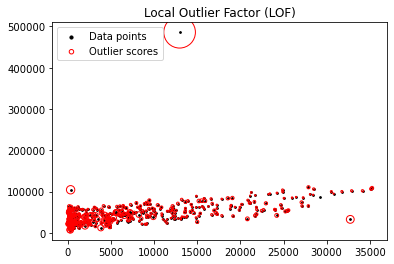

In [116]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(data_no_date)
X_scores = clf.negative_outlier_factor_


plt.title("Local Outlier Factor (LOF)")
plt.scatter(data_no_date[column[1]], data_no_date[column[4]], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    data_no_date[column[1]],
    data_no_date[column[4]],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# These data are not stationary, therefore outliers should not be looked for globally.